In [15]:
import geopandas as gpd 
import pandas as pd
from shapely.geometry import *

In [16]:
taxi = pd.read_csv('weekend.csv')
# taxi = taxi.drop('Unnamed: 0',axis=1)
taxi.head()
taxi.rename(columns={'Longitude':'Latitude','Latitude':'Longitude'},inplace=True)

In [19]:
taxi_sub = taxi

In [20]:
taxi_sub.head()

,Latitude,Longitude,date,time
0,1.300540,103.80059,2017-03-17,18:58:56
1,1.396308,103.90990,2017-03-17,18:52:25
2,1.303450,103.76456,2017-03-17,18:57:08
3,1.358805,103.95470,2017-03-17,18:58:56
4,1.358830,103.98949,2017-03-17,18:54:20


In [21]:
airport = gpd.GeoDataFrame.from_file('airport.shp')

In [22]:
def create_geometry(df):
    geometry_arr = df.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
    df = df.assign(geometry=geometry_arr)
    gdf = gpd.GeoDataFrame(df)
    return gdf

In [23]:
def filter_points(pts_gpd, poly):
    index = pts_gpd.apply(lambda x: not poly.contains(x['geometry']), axis=1)
    return pts_gpd.loc[index]
    

In [24]:
test = create_geometry(taxi)

In [25]:
test2 = filter_points(test, airport['geometry'].iloc[0])

In [26]:
test2.to_file('filter_test.shp', driver='ESRI Shapefile')

In [27]:
len(test)

4396

In [28]:
test2.head()

,Latitude,Longitude,date,time,geometry
0,1.300540,103.80059,2017-03-17,18:58:56,POINT (103.80059 1.30054)
1,1.396308,103.90990,2017-03-17,18:52:25,POINT (103.9099 1.396308)
2,1.303450,103.76456,2017-03-17,18:57:08,POINT (103.76456 1.30345)
3,1.358805,103.95470,2017-03-17,18:58:56,POINT (103.9547 1.358805)
5,1.273380,103.84810,2017-03-17,18:58:04,POINT (103.8481 1.27338)


In [29]:
test2.crs={'init':'epsg:4326'}

In [30]:
geo_utm_df= test2.to_crs(epsg=32648)

In [31]:
x1 = geo_utm_df.geometry.apply(lambda p:p.x)
x2 = geo_utm_df.geometry.apply(lambda p:p.y)

In [32]:
geo_utm_df['X']= x1
geo_utm_df['Y']= x2

In [33]:
import seaborn as sns
%matplotlib inline

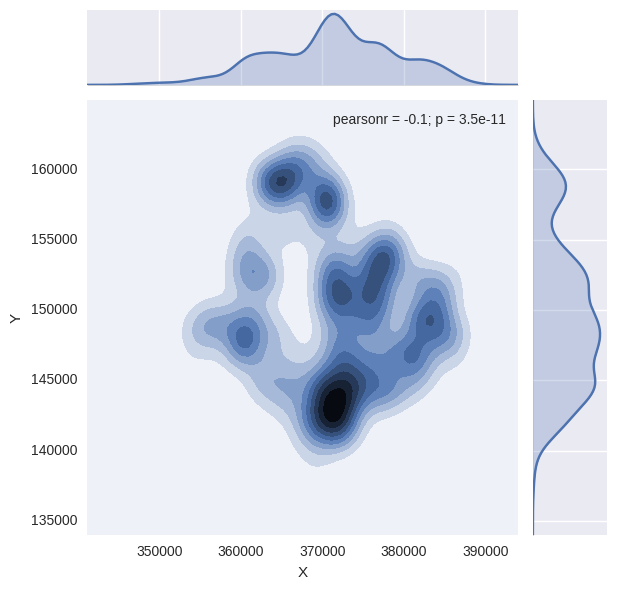

In [34]:
sns.jointplot(x= geo_utm_df.X, y=geo_utm_df.Y, kind='kde')